In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [4]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [5]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


* use only `Date` and `Adj Close` columns

In [6]:
wmt = wmt[["Date", "Adj Close"]].copy()

* rename columns to fit Prophet naming convention

In [7]:
wmt.columns = ["ds", "y"]

* convert date to datetime

In [25]:
wmt = wmt.astype({"ds": "datetime64"})

* plot time-series

In [29]:
wmt.head()

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


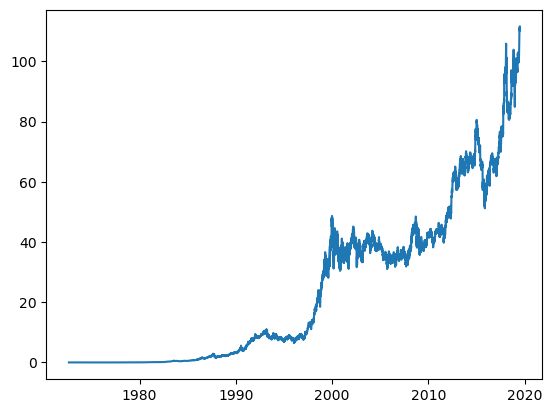

In [32]:
plt.plot(wmt["ds"], wmt["y"])
plt.show()

* instantiate Prophet

In [33]:
m = Prophet()

* fit model

In [34]:
m.fit(wmt)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* forecast 365 values in future 

In [36]:
forecast = m.predict(m.make_future_dataframe(365))

* plot forecast

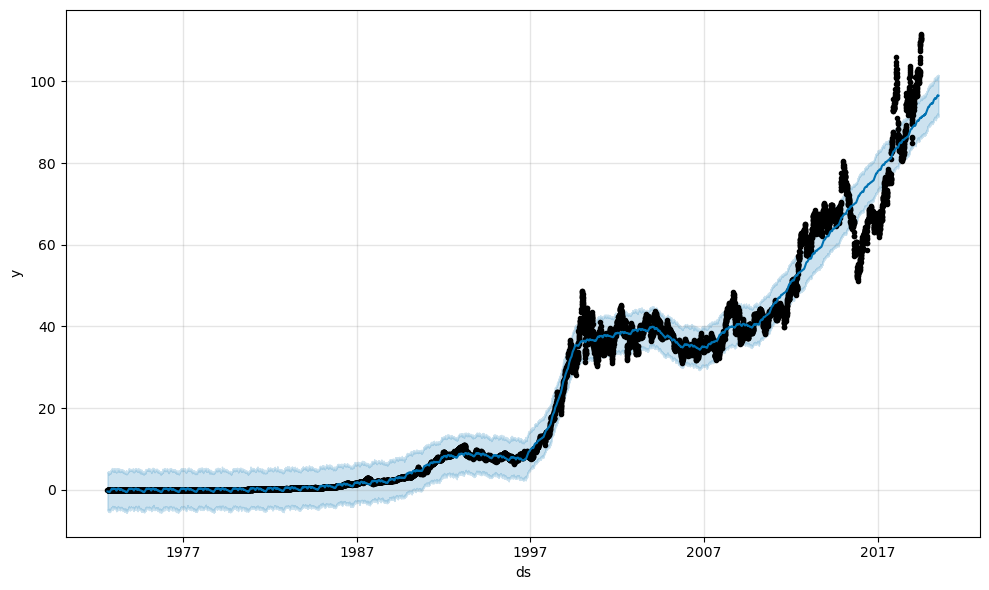

In [38]:
m.plot(forecast)

* plot components

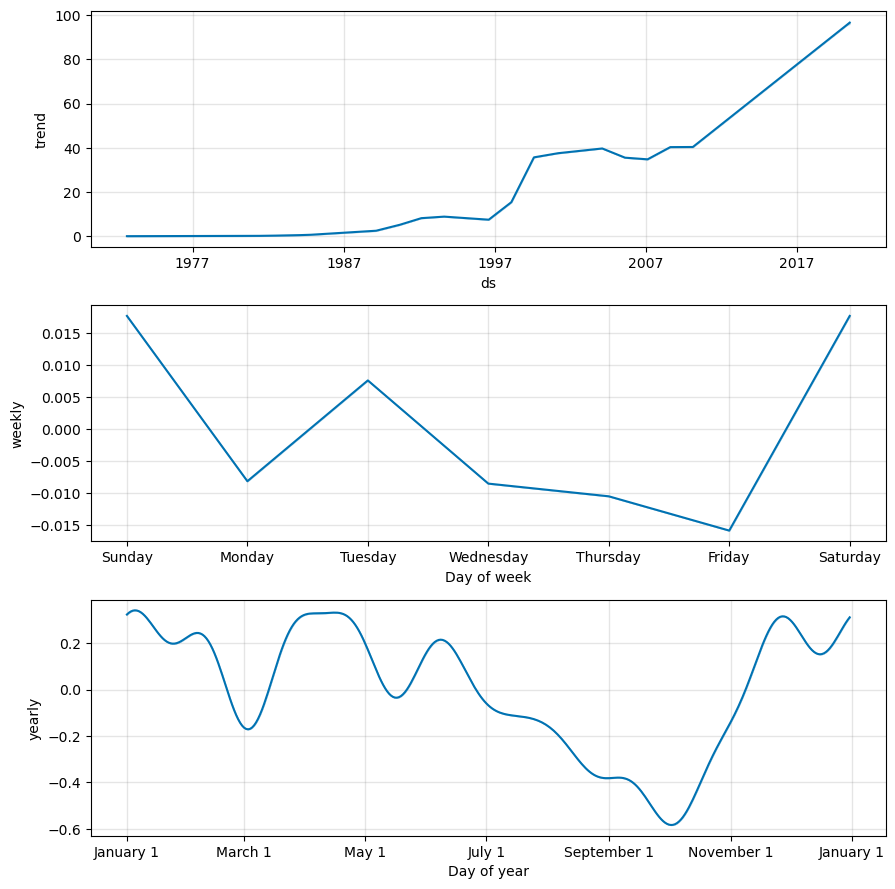

In [39]:
m.plot_components(forecast)

- Compare the Prophet prediction vs Arima. Use the last 7 values we have in the timeseries as ground truth.

In [89]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [43]:
wmt.head()

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


In [51]:
series = wmt.set_index("ds").squeeze()
series

ds
1972-08-25      0.023768
1972-08-28      0.023678
1972-08-29      0.023408
1972-08-30      0.023408
1972-08-31      0.023047
                 ...    
2019-06-26    110.160004
2019-06-27    110.099998
2019-06-28    110.489998
2019-07-01    110.620003
2019-07-02    111.599998
Name: y, Length: 11815, dtype: float64

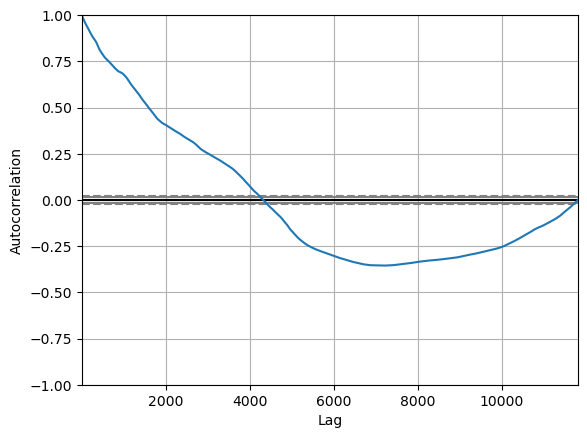

In [58]:
plt.figure()
autocorrelation_plot(series)
plt.show()

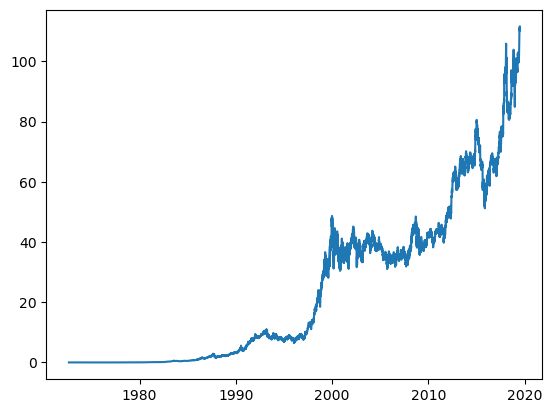

In [59]:
plt.figure()
plt.plot(series)
plt.show()

### Stationeritization

In [77]:
stationary = series.copy()

In [78]:
adfuller(stationary)

(2.265707124429886,
 0.9989323558687591,
 34,
 11780,
 {'1%': -3.4309052398582316,
  '5%': -2.8617853870722656,
  '10%': -2.5669006144698647},
 16744.897989876645)

In [79]:
stationary = stationary - stationary.shift()
stationary.fillna(method="bfill", inplace=True)

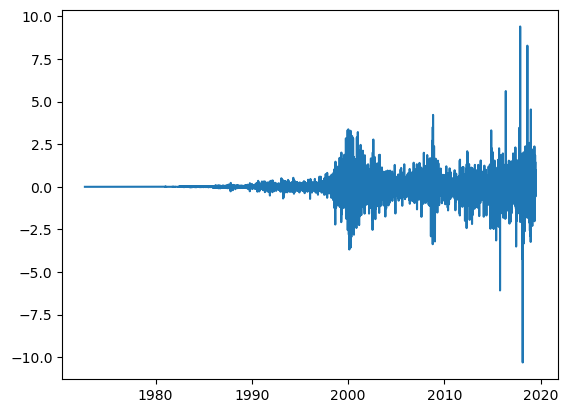

In [80]:
plt.figure()
plt.plot(stationary)
plt.show()

In [81]:
adfuller(stationary)

(-19.97086871762777,
 0.0,
 33,
 11781,
 {'1%': -3.4309051927178436,
  '5%': -2.861785366240619,
  '10%': -2.566900603381272},
 16748.040264409963)

In [124]:
y = series.values

for i in range(365):
    arima = ARIMA(y, order=(5, 1, 0))
    arima_fit = arima.fit()

    output = arima_fit.forecast()

    y = np.append(y, output)

/Users/zacharyargentin/opt/anaconda3/envs/bootcamp/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [125]:
series.shape

(11815,)

In [126]:
y.shape

(12180,)

In [130]:
arima_predictions = m.make_future_dataframe(365)

In [131]:
arima_predictions.head()

,ds
0,1972-08-25
1,1972-08-28
2,1972-08-29
3,1972-08-30
4,1972-08-31


In [132]:
arima_predictions["y"] = y

In [137]:
arima_predictions.tail(365)

,ds,y
11815,2019-07-03,111.570179
11816,2019-07-04,111.509844
11817,2019-07-05,111.485872
11818,2019-07-06,111.463553
11819,2019-07-07,111.436830
...,...,...
12175,2020-06-27,111.447817
12176,2020-06-28,111.447817
12177,2020-06-29,111.447817
12178,2020-06-30,111.447817


In [ ]:
arima_predictions = pd.Series(y, index=dates)

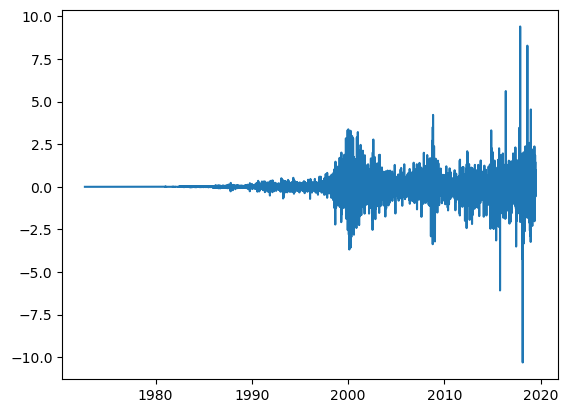

In [80]:
plt.figure()
plt.plot(arima_predictions)
plt.show()

arima just predicted the same number like a million times

This has made me realize that I am never going to use arima ever